In [158]:
%config IPCompleter.greedy=True
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [159]:
import numpy as np
import pandas as pd

In [160]:
import datetime as dt

In [161]:

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [162]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect = True)
session = Session(engine)


In [163]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [164]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [165]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [166]:
Station = Base.classes.station
Measurement = Base.classes.measurement


Text(0, 0.5, 'Inches')

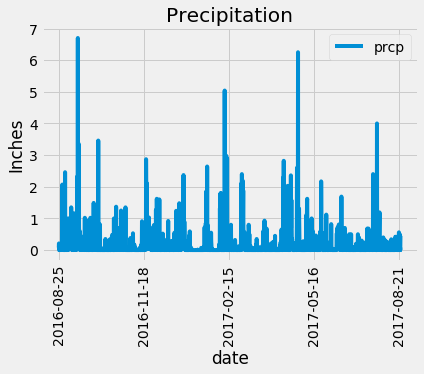

In [167]:
date_1_year_ago = dt.date(2017,8,23) - dt.timedelta(weeks =52)


past_year_data = session.query(Measurement.date, Measurement.prcp).\
                filter(func.strftime(Measurement.date) > date_1_year_ago).all()

past_year_data_df = pd.DataFrame(past_year_data, columns = ["date", "prcp"])


past_year_data_df.set_index("date", inplace = True)

past_year_data_df.dropna(inplace = True)

past_year_data_df.sort_index(inplace = True)

graph = past_year_data_df.plot(title = "Precipitation", rot = "vertical")
plt.ylabel("Inches")



In [168]:
past_year_data_df.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [169]:
# Design a query to show how many stations are available in this dataset?

number_of_stations = session.query(func.distinct(Measurement.station)).count()

number_of_stations

9

In [170]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [185]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp = session.query(func.min(Measurement.prcp)).filter(Measurement.station == "USC00519281").all()
highest_temp = session.query(func.max(Measurement.prcp)).filter(Measurement.station == "USC00519281").all()
avag_temp = session.query(func.avg(Measurement.prcp)).filter(Measurement.station == "USC00519281").all()

print(avag_temp)
print(lowest_temp)
print(highest_temp)

[(0.2123520923520915,)]
[(0.0,)]
[(9.64,)]


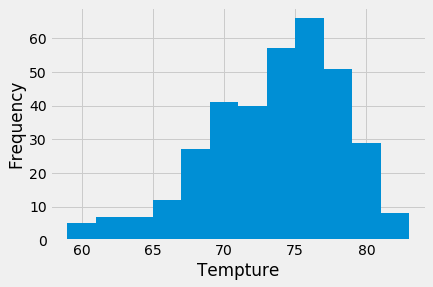

In [195]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


date_1_year_ago = dt.date(2017,8,23) - dt.timedelta(weeks =52)


past_year_data_tobs = session.query( Measurement.tobs).\
                filter(func.strftime(Measurement.date) > date_1_year_ago).\
                filter(Measurement.station == "USC00519281").all()


past_year_data_tobs = list(np.ravel(past_year_data_tobs))

plt.hist(past_year_data_tobs, bins=12)
plt.xlabel("Tempture")
plt.ylabel("Frequency")


plt.show()